In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

#### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

Среднее арифметическое:
    
$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

In [9]:
x = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

mean_x = sum(x) / len(x)
mean_x

65.3

Среднее квадратичное отклонение:
    
$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

In [19]:
array = []
for i in range(len(x)):
    n = (x[i] - mean_x) ** 2
    array.append(n)

print(array)

[1204.0900000000001, 216.0900000000001, 94.09000000000006, 136.89000000000007, 561.6900000000002, 1043.2899999999997, 412.08999999999986, 1624.0899999999997, 0.08999999999999829, 2332.89, 1246.0899999999997, 1705.6899999999998, 68.88999999999996, 106.08999999999995, 22.09000000000003, 94.09000000000006, 0.08999999999999829, 349.6900000000001, 610.0900000000001, 7174.09]


In [22]:
std_mean = np.sqrt(sum(array) / len(x))

std_mean

30.823854398825596

Смещенная оценка дисперсии:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [65]:
variance_x = sum(array) / len(x)

variance_x

1055.677777777778

Несмещенная оценка дисперсии:
    
$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [23]:
variance2_x = sum(array) / (len(x) - 1)

variance2_x

1000.1157894736842

#### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [37]:
df = pd.DataFrame({'pay': [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]})

df

,pay
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


Первый и третий квантиль:

In [39]:
df['pay'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: pay, dtype: float64

Интерквартильное расстояние:

In [43]:
q1 = df['pay'].quantile(0.25)
q3 = df['pay'].quantile(0.75)

iqr = q3 - q1
iqr

39.0

Выбросы в выборке:

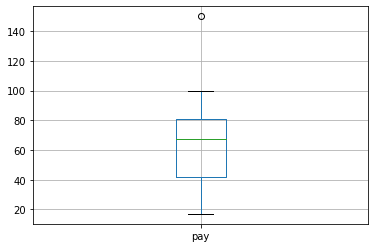

In [40]:
df[['pay']].boxplot()

In [44]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [53]:
outliers = df.loc[(df['pay'] < boxplot_range[0]) | (df['pay'] > boxplot_range[1])]

outliers

,pay
19,150


#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Событие A - студент сдал сессию

P(A) по формуле полной вероятности:

In [61]:
p_a1 = 1/4 * 0.8
p_a2 = 1/4 * 0.7
p_a3 = 1/2 * 0.9

p_a = p_a1 + p_a2 + p_a3
p_a

0.825

По формуле Байеса:

вероятность, что он учится на факультете A

In [62]:
p_a1/p_a

0.24242424242424246

вероятность, что он учится на факультете B

In [63]:
p_a2/p_a

0.21212121212121213

вероятность, что он учится на факультете C

In [64]:
p_a3/p_a

0.5454545454545455